In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pwd

'C:\\Users\\Шафигульны'

In [3]:
conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install python-graphviz


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install pydot


Note: you may need to restart the kernel to use updated packages.Solving environment: ...working... done


# All requested packages already installed.



In [6]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [7]:
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 10% !important; height: 10% !important;} </style>" 

In [8]:
titanic_data = pd.read_csv('file:///C:/Users/1FAB~1/AppData/Local/Temp/train.csv', )

In [9]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
X= titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket','Cabin'], axis=1)
y = titanic_data.Survived

In [12]:
X = pd.get_dummies(X)

In [13]:
X = X.fillna({'Age' : X.Age.median()})

In [14]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [15]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [16]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [17]:
from sklearn.model_selection import train_test_split


In [18]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size = 0.33, random_state= 42)

In [19]:
clf.score(X_train,y_train)

0.9714765100671141

In [20]:
clf.score(X_test, y_test)

0.9966101694915255

In [21]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [22]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [23]:
clf.score(X_train,y_train)

0.8406040268456376

In [24]:
clf.score(X_test, y_test)

0.8067796610169492

In [25]:
max_depth_values = range(1, 100)

In [26]:
scores_data = pd.DataFrame()

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score':[mean_cross_val_score]})

    scores_data =scores_data.append(temp_score_data)

In [29]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.800392


In [30]:
scores_data_long = pd.melt(scores_data,id_vars = ['max_depth'], value_vars = ['train_score', 'test_score','cross_val_score'],
                           var_name = 'set_type', value_name = 'score')

In [31]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [32]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.800392
203,6,cross_val_score,0.800392
204,7,cross_val_score,0.797017
205,8,cross_val_score,0.802045
206,9,cross_val_score,0.795308
207,10,cross_val_score,0.796989


<AxesSubplot:xlabel='max_depth', ylabel='score'>

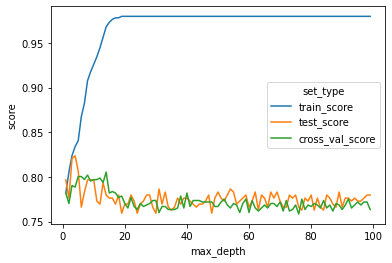

In [33]:
sns.lineplot(x='max_depth', y='score', hue = 'set_type', data= scores_data_long )

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)


In [36]:
cross_val_score(clf, X_test, y_test, cv=5).mean()


0.7864406779661017

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [39]:
parametrs = {'criterion':['gini', 'entropy'], 'max_depth':range (1,30)}

In [40]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [41]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [42]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [43]:
best_clf = grid_search_cv_clf.best_estimator_

In [44]:
best_clf.score(X_test, y_test)

0.7661016949152543

In [45]:
from sklearn.metrics import precision_score

In [46]:
y_pred = best_clf.predict(X_test)

In [47]:
precision_score(y_test, y_pred)

0.7931034482758621

In [48]:
from sklearn.metrics import recall_score

In [49]:
recall_score(y_test, y_pred)

0.575

In [50]:
y_predicted_prob = best_clf.predict_proba(X_test)

<AxesSubplot:>

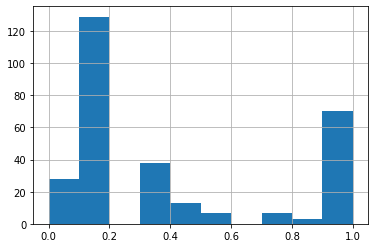

In [51]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [52]:
y_pred= np.where(y_predicted_prob[:, 1]>0.9, 1,0)

In [53]:
precision_score(y_test, y_pred)

0.8714285714285714

In [54]:
recall_score(y_test, y_pred)

0.5083333333333333

In [55]:
pd.Series(y_predicted_prob[:, 1]).unique()

array([0.11481481, 1.        , 0.34375   , 0.        , 0.76190476,
       0.875     , 0.39285714, 0.4       , 0.6       , 0.92307692,
       0.41176471])

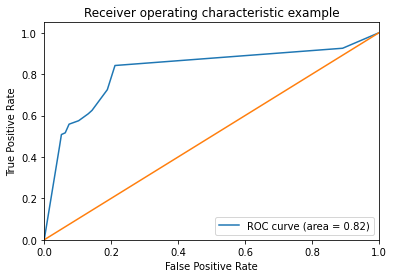

In [56]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.datasets import make_classification

fpr, tpr, trecholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0,1],[0,1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [69]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf =10)

In [70]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

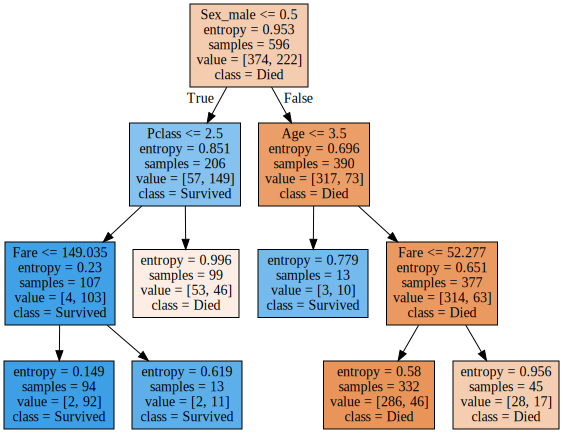

In [71]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
clf_rf = RandomForestClassifier()

In [7]:
parametrs = {'n_estimators' : [15], 'max_depth' : [5]}

In [8]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

NameError: name 'GridSearchCV' is not defined

In [4]:
grid_search_cv_clf.fit(X_train, y_train)

NameError: name 'grid_search_cv_clf' is not defined

In [83]:
grid_search_cv_clf.best_params_

{'max_depth': 10, 'n_estimators': 20}

In [89]:
best_clf = grid_search_cv_clf.best_estimator_

In [90]:
best_clf.score(X_test, y_test)

0.7932203389830509

In [92]:
feature_importances = best_clf.feature_importances_

In [94]:
feature_importances_df = pd.DataFrame({'feature': list(X_train),
                                       'feature_importances' : feature_importances})

In [96]:
feature_importances_df.sort_values('feature_importances', ascending = False)

,feature,feature_importances
5,Sex_female,0.332393
6,Sex_male,0.156915
0,Pclass,0.144166
4,Fare,0.123441
1,Age,0.107754
3,Parch,0.038873
2,SibSp,0.032820
7,Embarked_C,0.026668
9,Embarked_S,0.022587
8,Embarked_Q,0.014382
